In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
num_samples = 1000

# Generate random values for square footage, bedrooms, and bathrooms
square_footage = np.random.randint(800, 3500, size=num_samples)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.uniform(1, 4, size=num_samples)

# Generate prices based on the equation: price = 100 * square_footage + 20000 * bedrooms + 15000 * bathrooms + random_noise
random_noise = np.random.normal(0, 20000, size=num_samples)  # Random noise with normal distribution
prices = 100 * square_footage + 20000 * bedrooms + 15000 * bathrooms + random_noise

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': prices
})

# Save the dataset to a CSV file
data.to_csv('house_prices_dataset.csv', index=False)

# Display the first few rows of the dataset
print(data.head())

   Square Footage  Bedrooms  Bathrooms          Price
0            1660         5   3.519584  318817.868136
1            2094         5   3.700069  348559.267932
2            1930         5   2.060264  337088.875437
3            1895         4   1.710612  313910.577906
4            2438         4   3.341577  341772.450899


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
     

# Load the dataset
data = pd.read_csv('house_prices_dataset.csv')

     

data

,Square Footage,Bedrooms,Bathrooms,Price
0,1660,5,3.519584,318817.868136
1,2094,5,3.700069,348559.267932
2,1930,5,2.060264,337088.875437
3,1895,4,1.710612,313910.577906
4,2438,4,3.341577,341772.450899
...,...,...,...,...
995,1614,2,3.843064,241838.260953
996,3075,1,1.216949,337482.130718
997,2700,2,3.865346,405733.937475
998,3063,2,2.567730,395947.009461


In [3]:
# Separate features and target variable
X = data[['Square Footage', 'Bedrooms', 'Bathrooms']]
y = data['Price']
     

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
     

LinearRegression()

In [4]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

     

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 357321032.81042236


In [5]:
example_house = [[1800, 3, 2]]
predicted_price = model.predict(example_house)
print("Predicted Price:", predicted_price[0])

Predicted Price: 269140.5768620823


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


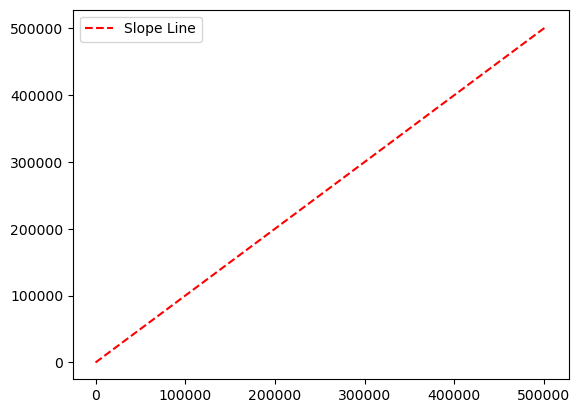

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
     

# Plot the slope line
max_price = max(y_test.max(), y_pred.max())
plt.plot([0, max_price], [0, max_price], color='red', linestyle='--')  # Slope line
plt.legend(['Slope Line', 'Predictions'])
plt.show()

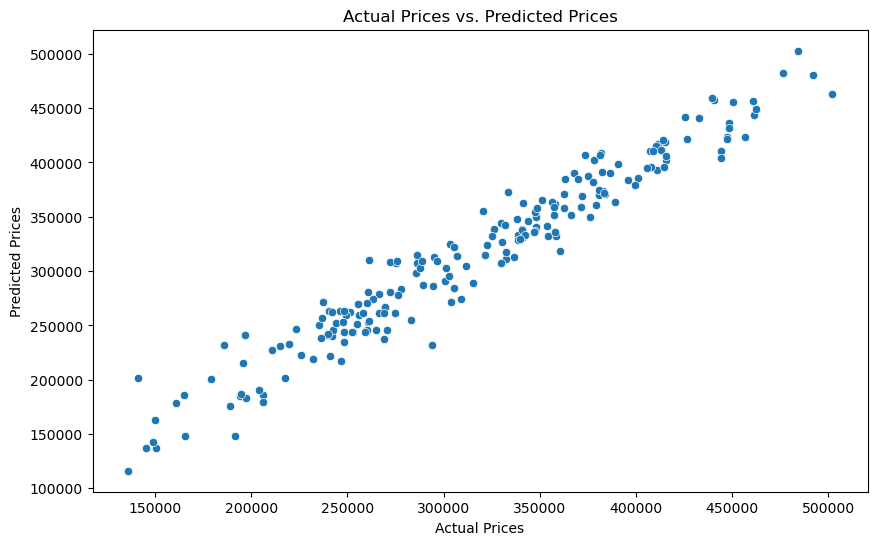

In [7]:
# Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()